# 분류(Classification)
* 지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
* 학습데이터로 주어진 데이터의 피처와 레이블값(결정, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.

## 01.분류의 모델 기법
* 베이즈 통계와 생성모델에 기반한 나이브 베이즈
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
* 데이터 균일도에 따른 규칙 기반의 의사결정트리(Decision Tree)
* 개별 틀래스 간의 최대 분류 마진을 효과적으로 찾아주는 SVM
* 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)기법
* 심층 연결기반의 신경망(Neural Network)
* 서로 다른 또는 같은 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

## 02.결정트리
* 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이요한 정보이득지수와 지니계수가 있다.
* 정보이득은 엔트로피라는 개념을 기반으로 합니다.엔트로피는 주어진 데이터집합의 혼잡도를 의미하는데 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
* 정보이득지수 = 1 - 엔트로피지수(혼잡도)
* 결정트리는 이 정보 이득 지수로 부할 기준을 정합니다. 즉, 정보 이득이 높은 속성을 기준으로 분할
* 지니계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수입니다. 경제학자인 코라지 지니의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등합니다.
머신러닝에 적용될때는 지니계수가 낮을 수록 데이터 균일도가 높은것으로 해석해서 지니계수가 낮은 속성을 기준으로 분할합니다.

### 붓꽃 데이터세트에 결정트리 적용

In [4]:
import warnings 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# graphviz - 의사결정 트리 시각화
from sklearn.tree import export_graphviz

In [3]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

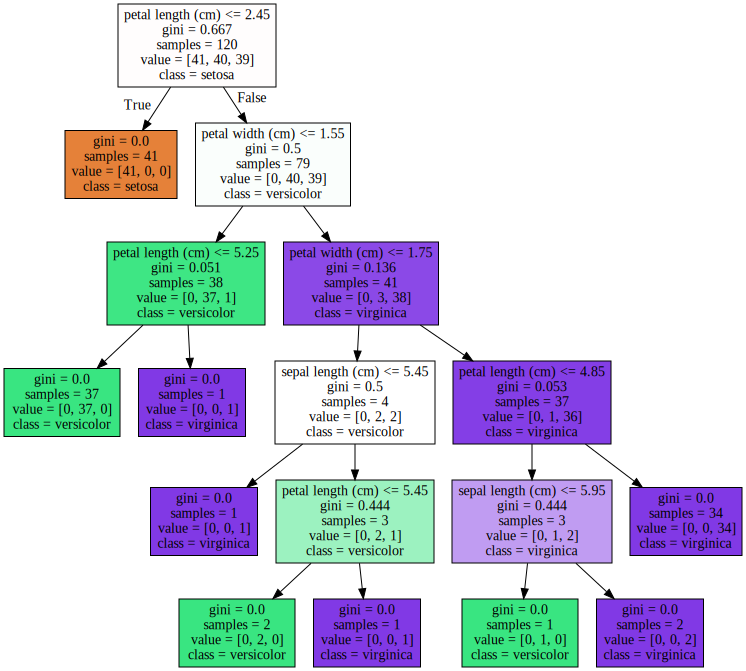

In [6]:
# DecisionTreaClassifier생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                   test_size = 0.2, random_state = 11)
#DecisionTreeClassifier학습
dt_clf.fit(X_train, y_train)



# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity = True, filled = True)
import graphviz
# 위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터 노트북상에서 시각화

with open("tree.dot", 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [5]:
help(export_graphviz)

Help on function export_graphviz in module sklearn.tree._export:

export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to GraphViz.
  

### feature_importance를 이용한 피처별 중요도 시각화

Feature Importance : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


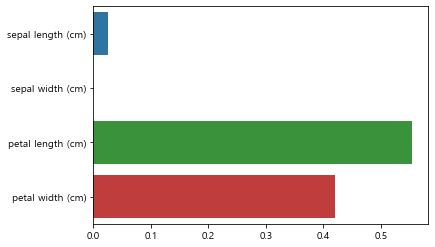

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance
print("Feature Importance : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    
# feature importance를 columns별로 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

* Petal Length가 가장 중요한 피처임을 알수있다.

### 결정트리 과적합(overfitting)
* 사이킷런은 분류를위한 테스트용 데이터셋를 쉽게 만들 수 있도록 make_classification() 함수를 제공

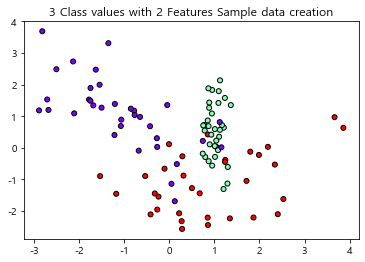

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")  # 해당 타이틀로 빈 캔버스가 그려짐.

# 2차원 시각화를 위해서 피처는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels  = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, \
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시함
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k', cmap = 'rainbow')

In [10]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

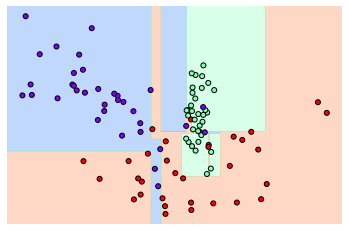

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약이 없는 결정트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 참조사이트 
* [clim 함수](https://www.geeksforgeeks.org/matplotlib-pyplot-clim-in-python/)
* [meshgrid](https://pinkwink.kr/717)

In [10]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

#### 잠깐만..meshgrid란?
* 01.numpy부분을 참조하라.

In [12]:
# -5부터 5부터 0.01간격으로 배열 생성
points = np.arange(-5, 5, 0.01)
points.shape

(1000,)

In [13]:
# 정방행렬로 만들어진다.(1000, 1000)
xs, ys = np.meshgrid(points, points)

In [ ]:
xs.shape

In [ ]:
ys.shape

In [14]:
z = np.sqrt(xs ** 2 + ys ** 2)
z.shape

(1000, 1000)

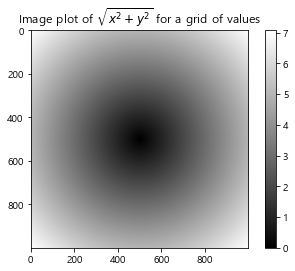

In [15]:
plt.title("Image plot of $\sqrt{x^2 +  y^2}$ for a grid of values")
plt.imshow(z, cmap = plt.cm.gray);plt.colorbar()
plt.show()

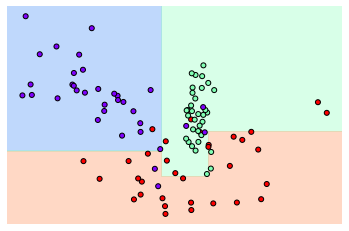

In [17]:
# min_samples_leaf = 6으로 틀 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 정리
* 의사결정트리 모델에 성능은 default세팅값보다 하이터 파라미터 튜닝을 더 적극적으로 해야 한다.
* 예를 들면, max_depth, min_samples_leaf정도는 상황에 따라 고려를 해야 될 수도 있다.

### 결정트리 실습 - 사용자 행동 인식 데이터세트
* UCI(머신러닝 리포지토리)에서 제공하는 사용자 행동인식 데이터세트에 예측 분류 수행
* 30명의 사용자에게 스마트폰 센서를 장착한뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터
* [관련 사이트](http://archive.uci.edu/ml/datasets/)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt파일을 읽어서 인덱스정보와 feature명을 확인
feature_name_df = pd.read_csv("./data/human_activity/features.txt", header = None, sep = " ",\
                             names = ["colmun_index", "column_name"])
feature_name_df.head()

# 피처명 인덱스를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
# feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name = feature_name_df.iloc[:,1]
print("전체 피처에서 10개만 추출 : \n", feature_name[:10])
print("전체 피처값 보기 : \n", feature_name_df.iloc[:,1].values)

전체 피처에서 10개만 추출 : 
 0    tBodyAcc-mean()-X
1    tBodyAcc-mean()-Y
2    tBodyAcc-mean()-Z
3     tBodyAcc-std()-X
4     tBodyAcc-std()-Y
5     tBodyAcc-std()-Z
6     tBodyAcc-mad()-X
7     tBodyAcc-mad()-Y
8     tBodyAcc-mad()-Z
9     tBodyAcc-max()-X
Name: column_name, dtype: object
전체 피처값 보기 : 
 ['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X' 'tBodyAcc-max()-Y' 'tBodyAcc-max()-Z'
 'tBodyAcc-min()-X' 'tBodyAcc-min()-Y' 'tBodyAcc-min()-Z' 'tBodyAcc-sma()'
 'tBodyAcc-energy()-X' 'tBodyAcc-energy()-Y' 'tBodyAcc-energy()-Z'
 'tBodyAcc-iqr()-X' 'tBodyAcc-iqr()-Y' 'tBodyAcc-iqr()-Z'
 'tBodyAcc-entropy()-X' 'tBodyAcc-entropy()-Y' 'tBodyAcc-entropy()-Z'
 'tBodyAcc-arCoeff()-X,1' 'tBodyAcc-arCoeff()-X,2'
 'tBodyAcc-arCoeff()-X,3' 'tBodyAcc-arCoeff()-X,4'
 'tBodyAcc-arCoeff()-Y,1' 'tBodyAcc-arCoeff()-Y,2'
 'tBodyAcc-arCoeff()-Y,3' 'tBodyAcc-arCoeff()

#### 중복된 피처명 확인

In [39]:
feature_name[feature_name.duplicated()].index

84

In [41]:
feature_name[feature_name.duplicated()].sort_values(ascending = False)

475     fBodyGyro-bandsEnergy()-9,16
489     fBodyGyro-bandsEnergy()-9,16
495    fBodyGyro-bandsEnergy()-57,64
481    fBodyGyro-bandsEnergy()-57,64
485    fBodyGyro-bandsEnergy()-49,64
                   ...              
316       fBodyAcc-bandsEnergy()-1,8
342      fBodyAcc-bandsEnergy()-1,24
328      fBodyAcc-bandsEnergy()-1,24
324      fBodyAcc-bandsEnergy()-1,16
338      fBodyAcc-bandsEnergy()-1,16
Name: column_name, Length: 84, dtype: object

In [50]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df["colmun_index"] > 1].count())  # 피처명이 중복된 것은 42개.

feature_dup_df[feature_dup_df["colmun_index"] > 1].head()

colmun_index    42
dtype: int64


,colmun_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


**중복된 피처명에 대해 원본 피처명에 `_1`혹은 `_2`를 붙혀서 데이터프레임을 반환하는 함수 작성.**

In [58]:
def get_new_feature_name(old_feature_name_df):
    """
    데이터프레임을 인자로 받아 중복된 피처들의 이름에 _1, _2 이렇게 라벨링해서 
    정제해 데이터프레임을 리턴
    """
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby("column_name").cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_'+ str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)
    return new_feature_name_df

get_new_feature_name(feature_name_df)

,colmun_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [63]:
import pandas as pd

def get_human_dataset():
    """
    분리된 학습용/테스트용 피처 데이터 세트 리턴
    """
    
    # 각 데이터파일은 공백으로 분리되어있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv("./data/human_activity/features.txt", sep = "\s+", header = None, names = ['column_index', 'column_name'])
    
    # 중복된 피처명을 컬럼으로 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성
    new_feature_name_df = get_new_feature_name(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩,
    # 칼럼명은 feature_name적용
    X_train = pd.read_csv("./data/human_activity/train/X_train.txt", sep ="\s+", names = feature_name)
    X_test = pd.read_csv("./data/human_activity/test/X_test.txt", sep = "\s+", names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼은 action으로 부여
    y_train = pd.read_csv("./data/human_activity/train/y_train.txt", sep = "\s+", names = ['action'], header = None)
    y_test  = pd.read_csv("./data/human_activity/test/y_test.txt", sep = "\s+", names = ['action'], header = None)

    # 로드된 학습/테스트용 DataFrame을 모두 리턴
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

### 로드한 학습용 피처 데이터세트 살펴보기

In [64]:
print("## 학습 피처 데이터세트 info()")
print(X_train.info())

## 학습 피처 데이터세트 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


** 총 로우의 갯수 : 7352,변수 : 561, 데이터타입은 float64로 별도의 인코딩을 위한 전처리는 불필요한 것으로 판단.

In [66]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

** 레이블값은 특정 값으로 왜곡되지 않고 분포가 고름.

### DecisionTreeClassifier를 이용한 동작예측분류 수행
* 모든 하이퍼 파라미터는 디폴트값 이용

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 예측트리 정확도 : {0:.4f}".format(accuracy))

print("사용된 모든 하이터 파라미터 추출 : \n", dt_clf.get_params())

결정 예측트리 정확도 : 0.8548
사용된 모든 하이터 파라미터 추출 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


* **GridSearchCV를 이용해 max_depth를 조정하면서 예측 성능 확인**

In [75]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최고 평균 정확도 수치  : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터   \n",grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  4.3min finished


GridSearchCV 최고 평균 정확도 수치  : 0.8513
GridSearchCV 최적 하이퍼 파라미터   
 {'max_depth': 16}


* 최적의 max_depth는 수행하는 pc마다 다를 수 있다.

In [ ]:
help(grid_cv)

**GridSearchCV.cv_results_ 속성을 통해 알아보는 성능수치**

In [77]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때이 테스트 세트 , 학습데이터 세트의 정화도 수치 추출
cv_result_df.head()

cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


**결정트리의 변화에 따른 성능 수치 변화**

In [81]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

#max_depths을 변화시키면서 그때마다 학습과 테스트에트에서의 예측 성능 평가
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_dept = {0} 정확도 : {1:.4f}".format(depth, accuracy))

max_dept = 6 정확도 : 0.8558
max_dept = 8 정확도 : 0.8707
max_dept = 10 정확도 : 0.8673
max_dept = 12 정확도 : 0.8646
max_dept = 16 정확도 : 0.8575
max_dept = 20 정확도 : 0.8548
max_dept = 24 정확도 : 0.8548


* max_depth가 8에서 정점을 찍고 이 값을 기점으로 떨어지기 시작함을 알 수 있다.
* 이처럼 결정트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이터 파라미터를 이용해 깊이를 제한할 수 있어야 합니다.
* 복잡한 모델보다는 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올수있음.

**max_depth와 min_sample_split을 같이 변경**
* GridSearchCV를 통한 성능 확인

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8, 12, 16, 20], 'min_samples_split' : [16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최고 평균 정확도 수치  : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터   \n",grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.3min finished


GridSearchCV 최고 평균 정확도 수치  : 0.8549
GridSearchCV 최적 하이퍼 파라미터   
 {'max_depth': 8, 'min_samples_split': 16}


** 가장 좋은 estimators**

In [88]:
best_dt_clf = grid_cv.best_estimator_

pred = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))
print("가장 최적의 esitmator : ", grid_cv.best_estimator_)

결정 트리 예측 정확도 : 0.8717
가장 최적의 esitmator :  DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)


**가장 중요한 Top20 중요 특성만 시각화**

In [98]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

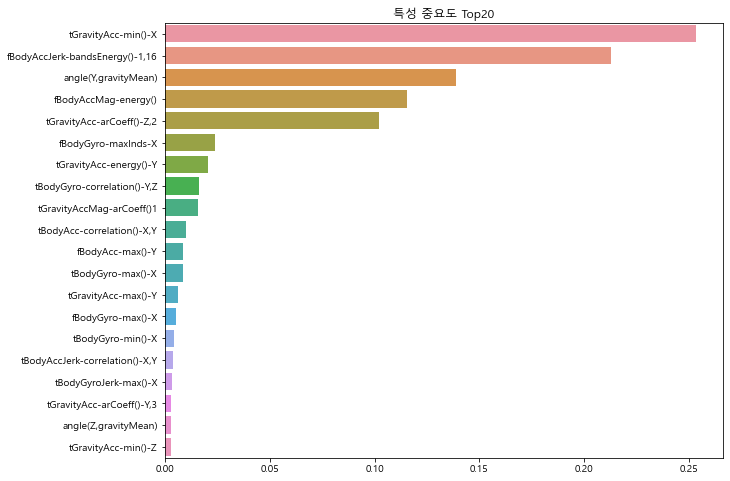

In [101]:
ftr_imortances = best_dt_clf.feature_importances_
type(ftr_imortances)
# 가장 중요한 20개의 특성
top20_ftr_importances = pd.Series(ftr_imortances, index = X_train.columns).sort_values(ascending = False)[:20]
top20_ftr_importances


plt.figure(figsize = (10, 8))
plt.title("특성 중요도 Top20")
sns.barplot(x = top20_ftr_importances, y = top20_ftr_importances.index)
plt.show()

## 정리
* 최상위 5개의 모션이 사용자의 행동인식에 영향을 가장 많이 주는것으로 나온다.
* 정보의 균일도에 기반한 규칙드리를 만들어서 예측을 수행
* 결정트리는 다른 알고리즘에 비해서 직관적이서 어떻게 예측결과가 도출되었는지 그 과정을 쉽게 알수 있다.
* 결정트리의 단점은 균일한 최종 예측결과를 도출하기 위해 결정 트리가 깊어지고 복잡해지면서 과적합이 쉽게 발생한다.